# Data Wrangling: 
# WeRateDogs Twitter Data Analysis

## Table of Contents
[Introduction](#Introduction)

[1. Data Gathering](#1.-Data-gathering)

[2. Data Assessment](#2.-Data-assessment)

[3. Data Cleaning](#3.-Data-cleaning)

[4. Data Analysis and Visualization](#4.-Data-analysis-and-visualization)

[Conclusions](#Conclusions)



## Introduction

This Data Wrangling student project analyzes Twitter data from the WeRateDogs account.

It aims to answer the following two research questions:

1.  Which are **the top 10 dog breeds**:

- based on the WeRateDogs official account ratings?

- based on follower retweets and likes?

- Is there any overlap between the top 10 breeds according to the WeRateDogs official rating and follower engagement (retweets and likes)?

2. Are the **'retweet' and 'like' rates correlated**?

The analysis uses the following three datasets:

- **Enhanced Twitter Archive**: the WeRateDogs Twitter archive containing basic tweet data for all of the account's 5000+ tweets, but there may be errors in the ratings, the dog names and the dog stages.

- **Image Predictions File**: the image predictions created through a neural network that can classify dog breeds alongside each tweet ID, image URL, and the image number that corresponds to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- **Additional Data via the Twitter API**: query of Twitter's API to gather the retweet count and the favorite count.

The project is organized in four sections:
1. Data gathering
2. Data assessment
3. Data cleaning
4. Data analysis and visualization

## 1. Data gathering

First, in the 'gather' stage, we will store all three datasets in pandas dataframes.

In [1]:
#import packages

import pandas as pd
import numpy as np
import requests
import json 
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
# install tweepy package

!pip install tweepy


#### Dataset 1: WeRateDogs Twitter archive 

In [3]:
# read the Twitter archive dataset in a dataframe

df_1 = pd.read_csv('twitter-archive-enhanced.csv')


In [4]:
# check result

df_1.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Dataset 2: tweet image predictions file

In [5]:
# download programmatically the tweet image predictions file in a .tsv format

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [6]:
# save the tweet image predictions file 

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    

In [7]:
# read the tweet image predictions file

df_2 = pd.read_csv('image-predictions.tsv', sep='\t')


In [8]:
# check result

df_2.head(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Dataset 3: Additional data from the Twitter API (retweet and favourite count) 


In [9]:
# import tweepy and create an API object we can use to gather the Twitter data

import tweepy

consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0


In [11]:
# create an array for the deleted tweet IDs
deleted = {}

# write tweet data for each id onto a new line in a text file
count = 0 

with open ('tweet_json.txt' , 'w') as file:
    for tweet_id in df_1['tweet_id'].values:
        count += 1
        try: 
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file) 
            file.write('\n')
            if count%100==0:
                print(str(count) + ": " + str(tweet_id))
                print("Success")
        except tweepy.TweepyException  as e:
                print("Fail")
                deleted[tweet_id] = e
                pass 



Fail
Fail
Fail
100: 872967104147763200
Success
Fail
Fail
Fail
Fail
Fail
Fail
Fail
200: 854120357044912130
Success
Fail
Fail
Fail
Fail
Fail
Fail
Fail
300: 836989968035819520
Success
Fail
Fail
400: 824796380199809024
Success
500: 813127251579564032
Success
Fail
Fail
600: 798682547630837760
Success
700: 786286427768250368
Success
Fail
Fail
800: 772826264096874500
Success
Fail
Fail
Fail
Fail
Fail
900: 758828659922702336
Success


Rate limit reached. Sleeping for: 478


Fail
1000: 748220828303695873
Success
1100: 735991953473572864
Success
1200: 716791146589110272
Success
1300: 707738799544082433
Success
1400: 699691744225525762
Success
1500: 692187005137076224
Success
1600: 686034024800862208
Success
1700: 680970795137544192
Success
Fail
1800: 677187300187611136
Success


Rate limit reached. Sleeping for: 474


1900: 674670581682434048
Success
2000: 672523490734551040
Success
2100: 670717338665226240
Success
2200: 668779399630725120
Success
2300: 667065535570550784
Success


In [12]:
# load the tweet_json.txt file into a pandas dataframe

df_3 = pd.read_json('tweet_json.txt', lines=True)


In [13]:
# check result 

df_3.head(3)


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


## 2. Data assessment

In [14]:
# visually assess df_1

df_1.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the first dataframe (the Twitter archive), we will use the tweet_id, the timestamp, the rating numerator and denominator, the name and the dog status (doggo, floofer, pupper or puppo)

In [16]:
# visually assess the dogs' names

df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:
df_1.name.sort_values()
                        

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

There are missing names and dogs referred to as 'a' and 'very', which appears to be an error.

In [18]:
#visually assess df_2

df_2.head(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


From the second dataframe, we will use the types of breed and the confidence rate, taking the neural network prediction with the highest confidence rate

In [20]:
# visually assess df_3

df_3.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [21]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   id                             2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

From the third dataframe (Twitter API), we will use the columns created_at, id, favorited and retweeted to see engagement with the tweets.

## Data Assessment Conclusions

### Quality issues

1. The dataset includes retweets and replies to tweets, not only original WeRateDogs account tweets. 

2. Missing values.

3. Errors in the dog names, inconsistent breeds names.

4. Missing images. 

5. The timestamp datatype is string.

6. The retweet and favorite count values are set as float datatypes.

7. The different predictions about the variable 'dog_breed' can be found in different columns.

8. Tweets beyond the August 1 2017 limit.

### Tidiness issues
1. There is information about each tweet dispersed across the three datasets.

2. Information about the variable 'dog_stage' can be found in different columns.


## 3. Data cleaning

#### Define

Quality issues

1. Delete the retweets and replies to tweets, keepig only the original WeRateDogs account tweets. 

2. Remove missing values.

3. Fix the errors in the dog names. 

4. Remove the tweets with missing images. 

5. Change the timestamp datatype from string to datetime.

6. Change the retweet and favorite count datatype from float to integer.

7. Transform different columns for dog prediction into one column for the variable 'dog_breed.

8. Delete tweets beyond the August 1 2017 limit.

Tidiness issues


3. Information about the variable 'dog_breed' can be found in different columns.

2. Transform different columns for each dog stage into one column for the variable 'dog_stage'.



**Code**

In [67]:
# make copies of all three datasets

df1_copy = df_1.copy()
df2_copy = df_2.copy()
df3_copy = df_3.copy()

In [69]:
# check result
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [71]:
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   tweet_id                       2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [73]:
# join the three dataframes, taking note of the key we can use for merging (twitter_id) and the number of rows 
# and columns to make sure nothing gets lost in the merge.

# first rename df_3 column 'id' to 'tweet_id' to facilitate merging
df3_copy.rename(columns={'id':'tweet_id'}, inplace=True)


In [74]:
# check result
df3_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2326 non-null   datetime64[ns, UTC]
 1   tweet_id                       2326 non-null   int64              
 2   id_str                         2326 non-null   int64              
 3   full_text                      2326 non-null   object             
 4   truncated                      2326 non-null   bool               
 5   display_text_range             2326 non-null   object             
 6   entities                       2326 non-null   object             
 7   extended_entities              2056 non-null   object             
 8   source                         2326 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [75]:
# merge dataframes on tweet_id and using an outer join to preserve all data

df_merged = df1_copy.merge(df2_copy, on='tweet_id', how='outer').merge(df3_copy, on='tweet_id', how='outer')
df_merged.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [76]:
#check result

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   int64              
 1   in_reply_to_status_id_x        78 non-null     float64            
 2   in_reply_to_user_id_x          78 non-null     float64            
 3   timestamp                      2356 non-null   object             
 4   source_x                       2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    float64            
 7   retweeted_status_user_id       181 non-null    float64            
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

All columns and rows have been kept in the merge. We can proceed with cleaning the new merged dataframe.

In [26]:
# drop the columns we will not use in the analysis

df_merged.drop(['source_x', 'text', 'expanded_urls', 'jpg_url', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source_y', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status', 'in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str', 'in_reply_to_screen_name'], axis=1, inplace=True)


In [27]:
# check result: there are 32 remaining columns

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id_x     78 non-null     float64            
 2   in_reply_to_user_id_x       78 non-null     float64            
 3   timestamp                   2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   rating_numerator            2356 non-null   int64              
 8   rating_denominator          2356 non-null   int64              
 9   name                        2356 non-null   object             
 10  doggo                       2356 non-null   object          

In [28]:
# Remove rows that have non-null values for in_reply_to_user_id (replies to tweets) and for \
# retweeted_status_id column (retweets) and those that have non-null. 

df_merged_original = df_merged[df_merged.retweeted_status_id.isnull() & df_merged.in_reply_to_status_id_x.isnull()]
df_merged_original.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id_x     0 non-null      float64            
 2   in_reply_to_user_id_x       0 non-null      float64            
 3   timestamp                   2097 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   rating_numerator            2097 non-null   int64              
 8   rating_denominator          2097 non-null   int64              
 9   name                        2097 non-null   object             
 10  doggo                       2097 non-null   object          

In [29]:
# remove rows with tweets after August 1st, 2017 and those that do not have images associated with them

df_merged_date = df_merged_original[df_merged_original['timestamp'] <= '2017-08-02']
df_merged_date.timestamp.unique()


array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

In [30]:
# remove rows for tweets without an image, retweet or favorite count as we will need the values for these
# variables in the analysis

df_merged_images = df_merged_date.dropna(subset=['img_num', 'retweet_count', 'favorite_count'])
df_merged_images.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1963 non-null   int64              
 1   in_reply_to_status_id_x     0 non-null      float64            
 2   in_reply_to_user_id_x       0 non-null      float64            
 3   timestamp                   1963 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   rating_numerator            1963 non-null   int64              
 8   rating_denominator          1963 non-null   int64              
 9   name                        1963 non-null   object             
 10  doggo                       1963 non-null   object          

We have removed all rows with missing values and are left with 298 tweets with full information.

In [31]:
# check result

df_merged_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1963 non-null   int64              
 1   in_reply_to_status_id_x     0 non-null      float64            
 2   in_reply_to_user_id_x       0 non-null      float64            
 3   timestamp                   1963 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   rating_numerator            1963 non-null   int64              
 8   rating_denominator          1963 non-null   int64              
 9   name                        1963 non-null   object             
 10  doggo                       1963 non-null   object          

In [32]:
# drop the remaining columns we needed to clean the rows but that we won't need in the analysis

df_merged_clean = df_merged_images.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
df_merged_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   object             
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   doggo               1963 non-null   object             
 6   floofer             1963 non-null   object             
 7   pupper              1963 non-null   object             
 8   puppo               1963 non-null   object             
 9   img_num             1963 non-null   float64            
 10  p1                  1963 non-null   object             
 11  p1_conf             1963 non-null   float64            
 12  p1_dog              1963 non-null 

#### Test

In [33]:
df_merged_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56+00:00,6849.0,32711.0
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,5154.0,28301.0
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,None,None,None,None,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,3401.0,21228.0
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,None,None,None,None,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51+00:00,7049.0,35643.0
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,None,None,None,None,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,7571.0,34129.0


In [34]:
# combine the different columns for each dog stage into one column for the variable 'dog_stage'.

condition_list = [df_merged_clean.doggo=='doggo', df_merged_clean.floofer=='floofer', df_merged_clean.pupper=='pupper', df_merged_clean.puppo=='puppo']
choice_list = ['doggo', 'floofer', 'pupper', 'puppo']
df_merged_clean['dog_stage'] = np.select(condition_list, choice_list) 
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   object             
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   doggo               1963 non-null   object             
 6   floofer             1963 non-null   object             
 7   pupper              1963 non-null   object             
 8   puppo               1963 non-null   object             
 9   img_num             1963 non-null   float64            
 10  p1                  1963 non-null   object             
 11  p1_conf             1963 non-null   float64            
 12  p1_dog              1963 non-null 

In [77]:
df_merged_clean.dog_stage.unique()

array(['0', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [35]:
# drop the doggo, floofer, pupper and puppo columns as they've been replaced by the dog_stage column

df_merged_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_merged_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   object             
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   img_num             1963 non-null   float64            
 6   p1                  1963 non-null   object             
 7   p1_conf             1963 non-null   float64            
 8   p1_dog              1963 non-null   object             
 9   p2                  1963 non-null   object             
 10  p2_conf             1963 non-null   float64            
 11  p2_dog              1963 non-null   object             
 12  p3                  1963 non-null 

In [36]:
# check result

df_merged_clean['dog_stage'].value_counts()


0          1661
pupper      201
doggo        72
puppo        22
floofer       7
Name: dog_stage, dtype: int64

In [37]:
# check for duplicates

df_merged_clean.duplicated().sum()


0

It appears that there were no duplicates in the dataset.

In [38]:
# create a new column showing the breed prediction with the highest confidence rate and where dog = True 
# (as there are some false predictions such as bagel or banana) 

df_merged_clean['dog_breed'] = np.where(df_merged_clean['p1_dog'], df_merged_clean['p1'],
                                   np.where(df_merged_clean['p2_dog'], df_merged_clean['p2'],
                                           np.where(df_merged_clean['p3_dog'], df_merged_clean['p3'], np.nan)))
df_merged_clean.head()               

,tweet_id,timestamp,rating_numerator,rating_denominator,name,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,retweet_count,favorite_count,dog_stage,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01 16:23:56+00:00,6849.0,32711.0,0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27+00:00,5154.0,28301.0,0,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,12,10,Archie,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03+00:00,3401.0,21228.0,0,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,13,10,Darla,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,2017-07-30 15:58:51+00:00,7049.0,35643.0,0,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,12,10,Franklin,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,7571.0,34129.0,0,basset


In [39]:
#test 

df_merged_clean.dog_breed.value_counts()


golden_retriever      156
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
                     ... 
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
silky_terrier           1
Irish_wolfhound         1
Name: dog_breed, Length: 113, dtype: int64

In [40]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   object             
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   img_num             1963 non-null   float64            
 6   p1                  1963 non-null   object             
 7   p1_conf             1963 non-null   float64            
 8   p1_dog              1963 non-null   object             
 9   p2                  1963 non-null   object             
 10  p2_conf             1963 non-null   float64            
 11  p2_dog              1963 non-null   object             
 12  p3                  1963 non-null 

In [41]:
# delete the breed prediction columns we no longer need

df_merged_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)


In [42]:
# check result

df_merged_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   object             
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   created_at          1963 non-null   datetime64[ns, UTC]
 6   retweet_count       1963 non-null   float64            
 7   favorite_count      1963 non-null   float64            
 8   dog_stage           1963 non-null   object             
 9   dog_breed           1658 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 168.7+ KB


The rating denominator as a rule  = 10 and rating numerator should as a rule  be > 10 and < 15. According to the WeRateDogs Twitter accout, the highest rating ever given to hero dogs is 15/10. Nevertheless, there are exceptions we need to keep in mind in the analysis.

In [43]:
# check numerator values smaller than 10 and larger than 15.

df_numerator = df_merged_clean.query('rating_numerator < 10 | rating_numerator > 15')
df_numerator.rating_numerator.value_counts()

9       150
8        95
7        52
5        33
6        32
3        19
4        16
2         9
1         5
144       1
26        1
80        1
88        1
121       1
44        1
60        1
45        1
204       1
99        1
50        1
1776      1
165       1
27        1
75        1
24        1
84        1
0         1
420       1
Name: rating_numerator, dtype: int64

In [44]:
# check denominator values not equal to 10

df_denominator = df_merged_clean.query('rating_denominator != 10')
df_denominator.rating_denominator.value_counts()


50     3
11     2
80     2
70     1
7      1
150    1
170    1
20     1
90     1
40     1
110    1
120    1
2      1
Name: rating_denominator, dtype: int64

In [45]:
# change timestamp data type from string to datetime

df_merged_clean['timestamp'] = pd.to_datetime(df_merged_clean['timestamp'])
df_merged_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   created_at          1963 non-null   datetime64[ns, UTC]
 6   retweet_count       1963 non-null   float64            
 7   favorite_count      1963 non-null   float64            
 8   dog_stage           1963 non-null   object             
 9   dog_breed           1658 non-null   object             
dtypes: datetime64[ns, UTC](2), float64(2), int64(3), object(3)
memory usage: 168.7+ KB


In [46]:
# change retweet_count and favorite_count datatype from float to integer

df_clean = df_merged_clean.astype({'retweet_count': int, 'favorite_count': int})
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   rating_numerator    1963 non-null   int64              
 3   rating_denominator  1963 non-null   int64              
 4   name                1963 non-null   object             
 5   created_at          1963 non-null   datetime64[ns, UTC]
 6   retweet_count       1963 non-null   int64              
 7   favorite_count      1963 non-null   int64              
 8   dog_stage           1963 non-null   object             
 9   dog_breed           1658 non-null   object             
dtypes: datetime64[ns, UTC](2), int64(5), object(3)
memory usage: 168.7+ KB


In [47]:
# normalize ratings by calculating the numerator/denominator ratio

df_clean['rating_normalized'] = df_clean['rating_numerator']/df_clean['rating_denominator']
df_clean.head()


,tweet_id,timestamp,rating_numerator,rating_denominator,name,created_at,retweet_count,favorite_count,dog_stage,dog_breed,rating_normalized
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,2017-08-01 16:23:56+00:00,6849,32711,0,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,2017-08-01 00:17:27+00:00,5154,28301,0,Chihuahua,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,2017-07-31 00:18:03+00:00,3401,21228,0,Chihuahua,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,2017-07-30 15:58:51+00:00,7049,35643,0,Labrador_retriever,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,2017-07-29 16:00:24+00:00,7571,34129,0,basset,1.2


In [48]:
# create a new variable for follower rating based on each tweet's like and retweet rate combined

df_clean['rating_followers'] = (df_clean['retweet_count']+df_clean['favorite_count'])/2
df_clean.head()


,tweet_id,timestamp,rating_numerator,rating_denominator,name,created_at,retweet_count,favorite_count,dog_stage,dog_breed,rating_normalized,rating_followers
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,2017-08-01 16:23:56+00:00,6849,32711,0,NaN,1.3,19780.0
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,2017-08-01 00:17:27+00:00,5154,28301,0,Chihuahua,1.3,16727.5
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,2017-07-31 00:18:03+00:00,3401,21228,0,Chihuahua,1.2,12314.5
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,2017-07-30 15:58:51+00:00,7049,35643,0,Labrador_retriever,1.3,21346.0
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,2017-07-29 16:00:24+00:00,7571,34129,0,basset,1.2,20850.0


In [49]:
# format dog breed names

df_clean['dog_breed'] = df_clean['dog_breed'].str.lower()
df_clean.head()


,tweet_id,timestamp,rating_numerator,rating_denominator,name,created_at,retweet_count,favorite_count,dog_stage,dog_breed,rating_normalized,rating_followers
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,2017-08-01 16:23:56+00:00,6849,32711,0,NaN,1.3,19780.0
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,2017-08-01 00:17:27+00:00,5154,28301,0,chihuahua,1.3,16727.5
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,2017-07-31 00:18:03+00:00,3401,21228,0,chihuahua,1.2,12314.5
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,2017-07-30 15:58:51+00:00,7049,35643,0,labrador_retriever,1.3,21346.0
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,2017-07-29 16:00:24+00:00,7571,34129,0,basset,1.2,20850.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
# store the clean dataset to a csv file

df_clean.to_csv('weratedogs_dataset.csv', index=False)


## 4. Data analysis and visualization

This section analyzes the clean and formatted data, providing answers to the project's research questions:

1.  Which are **the top 10 dog breeds**:

- based on the WeRateDogs official account ratings?

- based on followers' retweets and likes?

- Is there any overlap between the top 10 breeds according to the WeRateDogs official rating and follower engagement (retweets and likes)?

2. Are the **'retweet' and 'like' rates correlated**?


### Question 1: Which are the top 10  dog breeds:

- according to the WeRateDogs account owner?



In [51]:
# define a function to find the average ratings (official, retweets, likes and followers' rating) 
# for the different breeds. Make sure the result is a dataframe and not a series.

def avgbreed(x):
    '''finds the average ratings (official, retweets, likes and follower engagament) for the different breeds'''
    return df_clean.groupby('dog_breed')[x].mean().sort_values(ascending=[False]).to_frame().head(10)


In [52]:
# find the top 10 breeds according to their average offical WeRateDogs rating

top10_official = avgbreed('rating_normalized')
top10_official


,rating_normalized
dog_breed,
clumber,2.700000
bouvier_des_flandres,1.300000
pomeranian,1.253659
saluki,1.250000
briard,1.233333
tibetan_mastiff,1.225000
border_terrier,1.214286
silky_terrier,1.200000
standard_schnauzer,1.200000


The most highly appreciated breed according to the official WeRateDogs rating is the clumber.

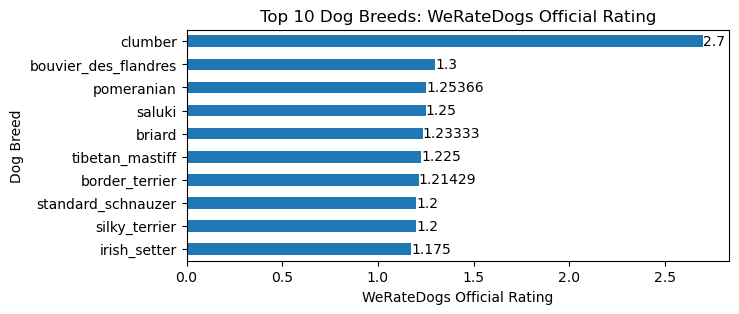

In [54]:
# visualize the top 10 dog breeds according to their average WeRateDogs official rating

ax = top10_official.sort_values('rating_normalized').plot.barh(title="Top 10 Dog Breeds: WeRateDogs Official Rating", figsize=(7, 3))
plt.xlabel("WeRateDogs Official Rating")
plt.ylabel("Dog Breed")
ax.bar_label(ax.containers[0])
plt.legend().remove()
plt.show()


- Which are the top 10 dog breeds according to the WeRateDogs followers?

In [55]:
# find the top 10 breeds based on average retweet count 

top10_retweet = avgbreed('retweet_count').round()
top10_retweet


,retweet_count
dog_breed,
bedlington_terrier,6526.0
afghan_hound,4680.0
standard_poodle,4379.0
french_bulldog,4299.0
english_springer,4299.0
saluki,4032.0
whippet,4014.0
cocker_spaniel,3871.0
eskimo_dog,3785.0


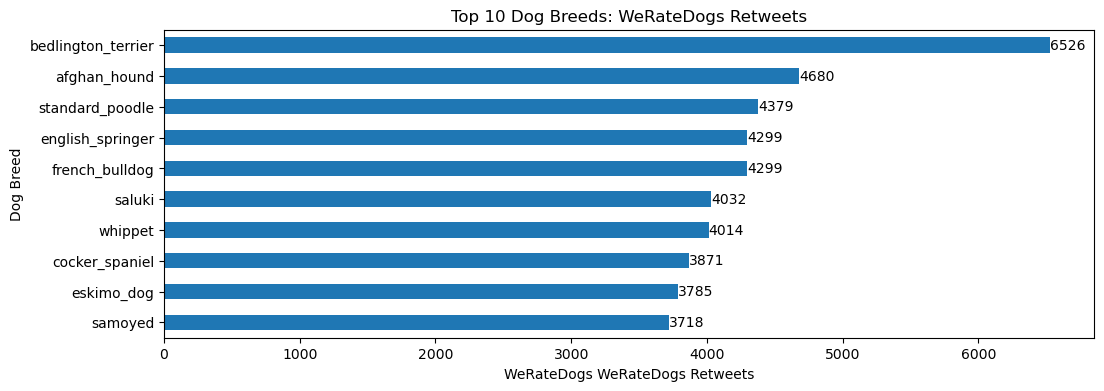

In [56]:
ax = top10_retweet.sort_values('retweet_count').plot.barh(title="Top 10 Dog Breeds: WeRateDogs Retweets", figsize=(12, 4))
plt.xlabel("WeRateDogs WeRateDogs Retweets")
plt.ylabel("Dog Breed")
ax.bar_label(ax.containers[0])
plt.legend().remove()
plt.show()

In [57]:
# find the top 10 breeds based on favorite count

top10_favorite = avgbreed('favorite_count').round()
top10_favorite


,favorite_count
dog_breed,
bedlington_terrier,20883.0
saluki,20117.0
french_bulldog,16950.0
bouvier_des_flandres,14871.0
afghan_hound,14221.0
black-and-tan_coonhound,14155.0
flat-coated_retriever,13971.0
irish_water_spaniel,13509.0
whippet,12311.0


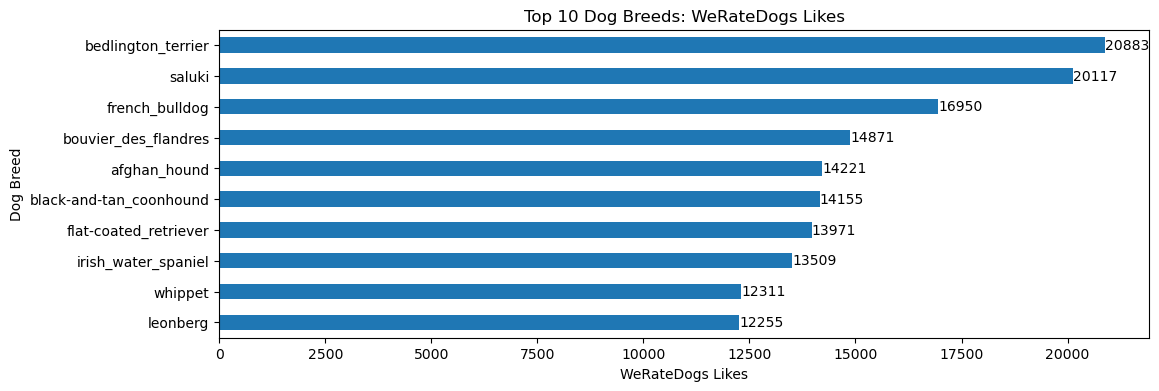

In [58]:
# find the top 10 breeds based on likes

ax = top10_favorite.sort_values('favorite_count').plot.barh(title="Top 10 Dog Breeds: WeRateDogs Likes", figsize=(12, 4))
plt.xlabel("WeRateDogs Likes")
plt.ylabel("Dog Breed")
ax.bar_label(ax.containers[0])
plt.legend().remove()
plt.show()

In [59]:
# find the top 10 breeds based on follower engagement (likes and retweets combined)

top10_followers = avgbreed('rating_followers').round()
top10_followers


,rating_followers
dog_breed,
bedlington_terrier,13704.0
saluki,12075.0
french_bulldog,10624.0
afghan_hound,9450.0
bouvier_des_flandres,9186.0
flat-coated_retriever,8794.0
black-and-tan_coonhound,8696.0
irish_water_spaniel,8515.0
whippet,8163.0


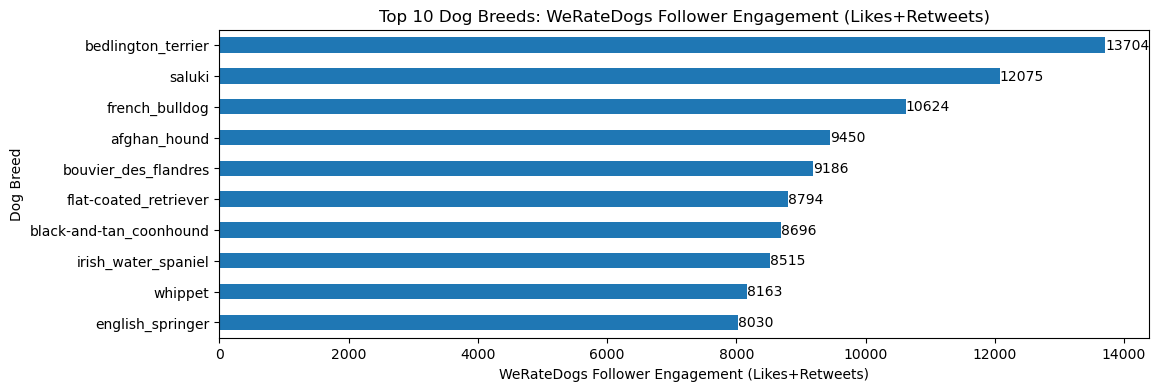

In [60]:
ax = top10_followers.sort_values('rating_followers').plot.barh(title="Top 10 Dog Breeds: WeRateDogs Follower Engagement (Likes+Retweets)", figsize=(12, 4))
plt.xlabel("WeRateDogs Follower Engagement (Likes+Retweets)")
plt.ylabel("Dog Breed")
ax.bar_label(ax.containers[0])
plt.legend().remove()
plt.show()


Is there an overlap between the top 10 breeds according to the WeRateDogs official rating and follower engagement (retweets and likes)?


In [61]:
# divide the count values to reduce the difference in size allowing visualizing all four variables on the same plot

top10_followers_2 = (top10_followers/1000).round()
top10_followers_2


,rating_followers
dog_breed,
bedlington_terrier,14.0
saluki,12.0
french_bulldog,11.0
afghan_hound,9.0
bouvier_des_flandres,9.0
flat-coated_retriever,9.0
black-and-tan_coonhound,9.0
irish_water_spaniel,9.0
whippet,8.0


In [62]:

top10_retweet_2 = (top10_retweet/1000).round()
top10_retweet_2


,retweet_count
dog_breed,
bedlington_terrier,7.0
afghan_hound,5.0
standard_poodle,4.0
french_bulldog,4.0
english_springer,4.0
saluki,4.0
whippet,4.0
cocker_spaniel,4.0
eskimo_dog,4.0


In [63]:
top10_favorite_2 = (top10_favorite/1000).round()
top10_favorite_2

,favorite_count
dog_breed,
bedlington_terrier,21.0
saluki,20.0
french_bulldog,17.0
bouvier_des_flandres,15.0
afghan_hound,14.0
black-and-tan_coonhound,14.0
flat-coated_retriever,14.0
irish_water_spaniel,14.0
whippet,12.0


In [64]:
# merge the four dataframes

df_rating_merged = top10_official.merge(top10_retweet_2, how='outer', on='dog_breed').merge(top10_favorite_2, how='outer', on='dog_breed').merge(top10_followers_2, how='outer', on='dog_breed')
df_rating_merged


,rating_normalized,retweet_count,favorite_count,rating_followers
dog_breed,,,,
clumber,2.700000,NaN,NaN,NaN
bouvier_des_flandres,1.300000,NaN,15.0,9.0
pomeranian,1.253659,NaN,NaN,NaN
saluki,1.250000,4.0,20.0,12.0
briard,1.233333,NaN,NaN,NaN
tibetan_mastiff,1.225000,NaN,NaN,NaN
border_terrier,1.214286,NaN,NaN,NaN
silky_terrier,1.200000,NaN,NaN,NaN
standard_schnauzer,1.200000,NaN,NaN,NaN


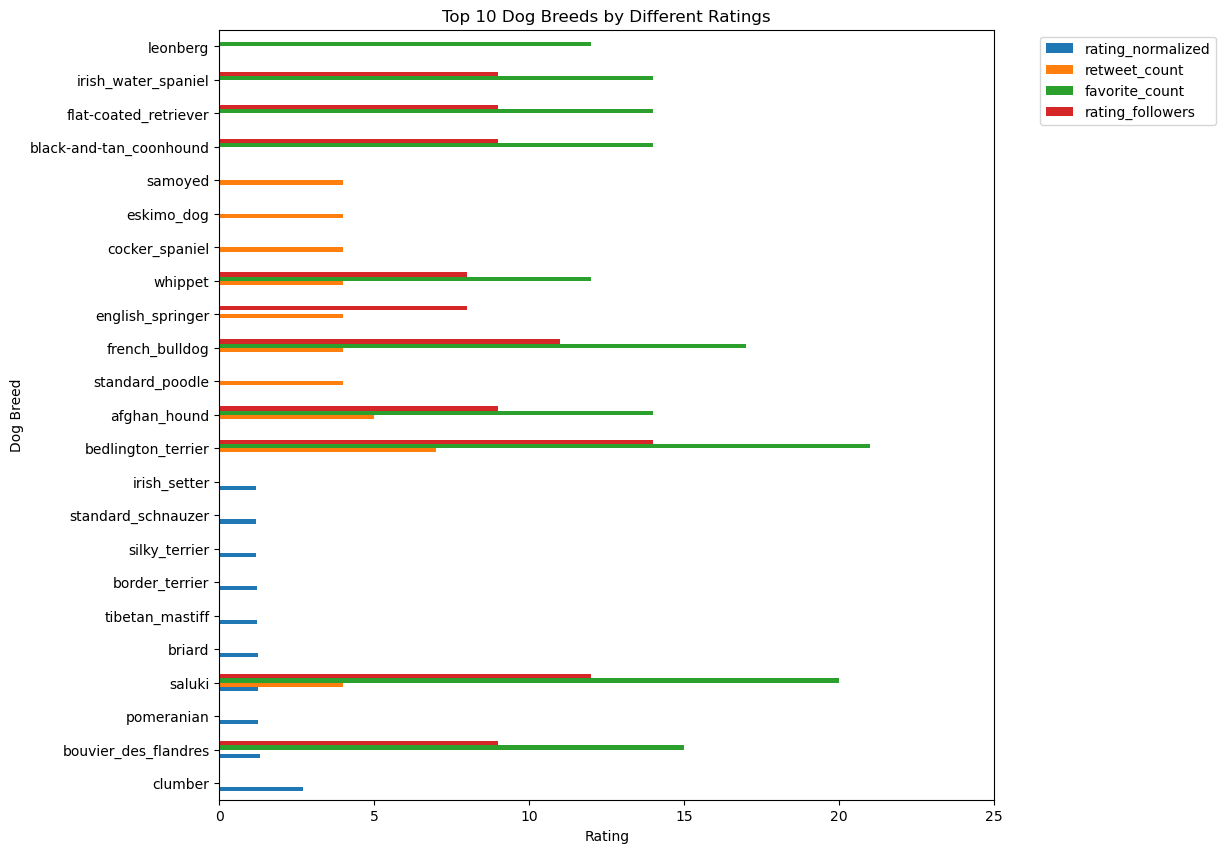

In [65]:
# plot the top 10 breeds according to the different rating systems to see if there is any overlap

df_rating_merged.plot.barh(title="Top 10 Dog Breeds by Different Ratings", figsize=(10, 10))
plt.xticks([0, 5, 10, 15, 20, 25])
plt.yticks()
plt.xlabel("Rating")
plt.ylabel("Dog Breed")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


There doesn't seem to be any important overlap between the breeds according to the official WeRateDogs rating and the follower engagement rating estimated by the number of likes and retweets. We can conclude that the most appreciated dog breed is the saluki which appears in the top 10 charts according to all rating metrics.



### Question 2: Is there a relationship between retweets and likes?

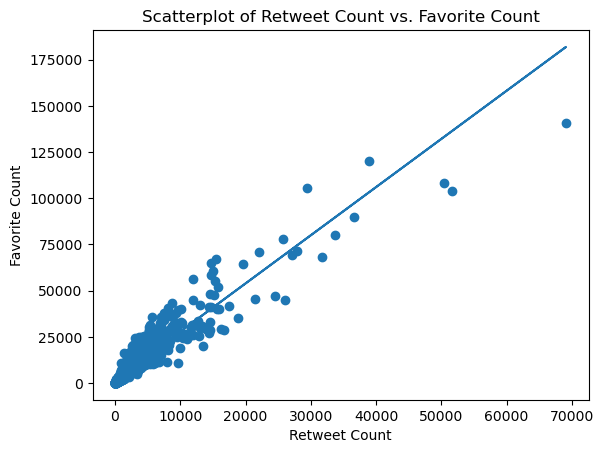

In [78]:
# create a scatterplot of two variables
x = df_clean['retweet_count']
y = df_clean['favorite_count']
plt.scatter(x, y)

# add axis labels and a title
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Scatterplot of Retweet Count vs. Favorite Count')

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

# display the plot
plt.show()



As expected, the likes and retweet rates have a strong positive correlation.

### Conclusions
1.	The most appreciated dog breed taking all rating metrics into account is the saluki.
2.	The most appreciated dog breed according to the official WeRateDogs rating is the clumber.
3.	The most appreciated dog breed according to total follower engagement (likes+ retweets) is the Bedlington terrier.
4.	There is almost no overlap between the top 10 breeds according to the official WeRateDogs ratings and according to follower engagement (likes + tweets).
5.	The 'retweet' and 'like' rates are positively correlated.

The WeRateDogs channel has started a foundation called 15outof10 to help dogs that are less likely to be adopted. If you want to learn more and support them, check out 15outof10.org